In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(20,5))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

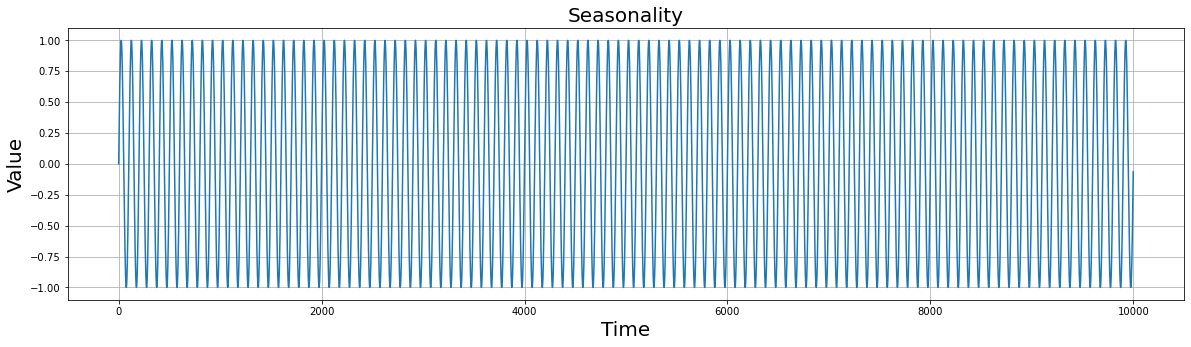

In [4]:
period = 100
repeat = 100

# Just a random pattern
values = [np.sin(x / period * 2 * np.pi) for x in range(period)]
# Repeat the pattern 5 times
seasonal = []
for i in range(repeat):
    for j in range(period):
        seasonal.append(values[j])
seasonal = np.array(seasonal)

# Plot
time_seasonal = np.arange(period * repeat)
plot_time_series(time_seasonal, seasonal, label="Seasonality")

110.21612275401023


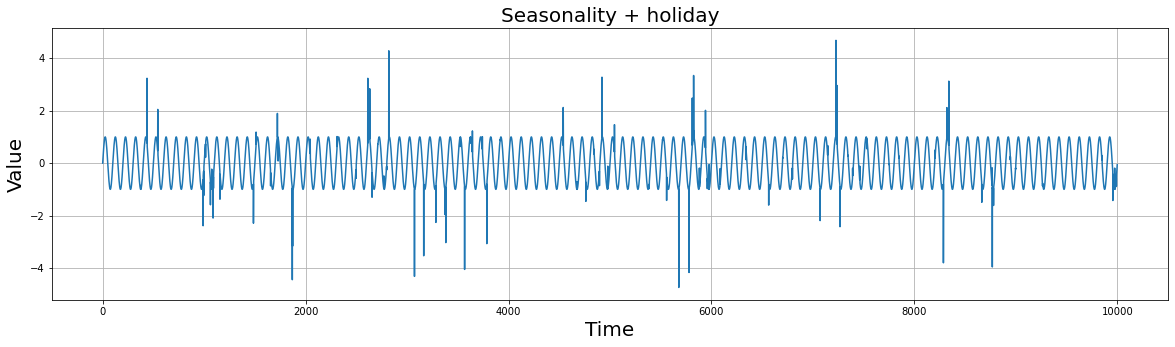

In [5]:
N = period * repeat
H = int(N * 0.01)

p = np.random.rand(N, )
p = p / p.sum()

for i in range(10):
    start = np.random.randint(N)
    end = int(start + N / 10)
    p[start: end] = sorted(p[start: end])

holiday = np.random.choice(N, H, replace=False, p=p)
holiday.sort()
print(np.diff(holiday).std())
holiday_factor = np.random.rand(H) * 5.0

seasonal_holiday = seasonal.copy()
for h, hf in zip(holiday, holiday_factor):
    seasonal_holiday[h + 1] = seasonal[h + 1] * hf

plot_time_series(time_seasonal, seasonal_holiday, label="Seasonality + holiday")

In [6]:
holi = np.ones_like(seasonal_holiday)
holi[holiday] = holiday_factor
# np.save('./holiday', holi)
np.stack((seasonal_holiday, holi), axis=1).shape

(10000, 2)

In [7]:
data_dir = '../data/sin_mul_5/'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
np.save(data_dir + 'with_holiday', np.stack((seasonal_holiday, holi), axis=1))